<center> 
    <div style="font-size: 40px;">
        <strong>
            <U>Projet IA HumanForYou </U>
        </strong>
    </div>
</center>

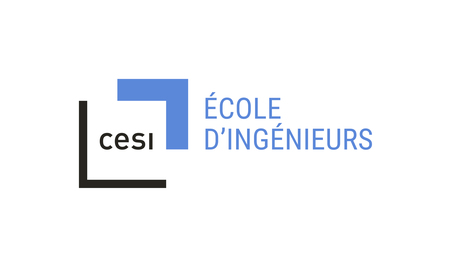


<center> 
    GIRARD-TISSIER Ugo
     | 
    GISLARD Enzo
     | 
    GUESMIA Abdelrahmane
     | 
    CASENOVE Antoine
</center>

In [1]:
#import généraux
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Introduction

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

* Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

* Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

* Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction nous fait donc appel pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

# 2. Préparation des données

### A. Chargement des jeux de données

Les données fournies par HumanForYou ont, dans un premier temps, été téléchargées et placées dans le répertoire `datasets`.

Nous allons maintenant créer une fonction utilisant [`Pandas`](https://pandas.pydata.org/) qui s'occupe de charger les données en mémoire dans un `Pandas DataFrame`.

In [2]:
import os

def load_datasets(path, file_name):
    csv_path = os.path.join(path, file_name)
    return pd.read_csv(csv_path)

Il est maintenant possible de charger nos données pour chaque fichier CSV transmis par HumanForYou

In [3]:
general_data = load_datasets("datasets", "general_data.csv")
manager_survey_data = load_datasets("datasets", "manager_survey_data.csv")
employee_survey_data = load_datasets("datasets", "employee_survey_data.csv")
in_time_data = load_datasets("datasets", "in_time.csv")
out_time_data = load_datasets("datasets", "out_time.csv")

Nous allons afficher les premières lignes de nos diffèrents tableaux `Pandas` pour en faire une première approche

In [4]:
general_data.head(2).style

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.000000,Y,11,8,0,1.000000,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.000000,Y,23,8,1,6.000000,3,5,1,4


In [5]:
manager_survey_data.head(2).style

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [6]:
employee_survey_data.head(2).style

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.000000,4.000000,2.000000
1,2,3.000000,2.000000,4.000000


In [7]:
in_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,nan,2015-01-15 10:01:24,2015-01-16 10:19:08,nan,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,nan,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,nan,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,nan,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,nan,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,nan,2015-03-27 09:47:30,2

In [8]:
out_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,nan,2015-01-15 17:22:13,2015-01-16 17:35:11,nan,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,nan,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,nan,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,nan,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,nan,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,nan,2015-03-27 17:20:51,2

### B. Construction d'un unique dataset

Pour éviter de se compliquer la tache, il est preferable de travailler avec un seul et unique dataset. Or l'entreprise nous a transmis des jeux de données qui sont liés à leurs employés. Nous allons donc essayer de "joindre" ces jeux de données en un seul tableau.

Nous vérifions dans un premier si nos tableaux `Pandas` contiennent le même nombre de ligne

In [9]:
print("Dimensions general_data :", general_data.shape)
print("Dimensions manager_survey_data :", manager_survey_data.shape)
print("Dimensions employee_survey_data :", employee_survey_data.shape)
print("Dimensions in_time_data :", in_time_data.shape)
print("Dimensions out_time_data :", out_time_data.shape)

Dimensions general_data : (4410, 24)
Dimensions manager_survey_data : (4410, 3)
Dimensions employee_survey_data : (4410, 4)
Dimensions in_time_data : (4410, 262)
Dimensions out_time_data : (4410, 262)


Bonne nouvelle! Les tableaux contiennent tous le même nombre de ligne. Il semblerait que nous ayons donc une ligne par employé dans chaque tableau. 

Nous pouvons commencer par essayer de "joindre" les tableaux `general_data` et `manager_survey_data`. En effet, ces deux tableaux ont une colonne similaire nommée `EmployeeID` qui semble la plus adaptée à une jointure. 

Avant de faire la jointure, nous allons vérifier qu'il n'y a pas de doublons sur cette donnée car cela pourrait planter notre jointure.

In [10]:
print("Nombre de ligne unique general_data : ", general_data.EmployeeID.unique().shape)
print("Nombre de ligne unique manager_survey_data : ", manager_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique general_data :  (4410,)
Nombre de ligne unique manager_survey_data :  (4410,)


Parfait, le nombre d'élément unique est le même, nous pouvons faire la jointure sur cette colonne

In [11]:
dataset = general_data.join(manager_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 26)


Nous obtenons bien le même nombre de ligne et nous avons bien les 24 colonnes de `general_data` plus les 2 colonnes de `manager_survey_data` (`EmployeeID` n'ayant été gardée qu'une seule fois lors de la jointure) 

Nous pouvons maintenant réexécuter cette procédure avec les tableaux `dataset` et `employee_survey_data`

In [12]:
print("Nombre de ligne unique employee_survey_data : ", employee_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique employee_survey_data :  (4410,)


In [13]:
dataset = dataset.join(employee_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 29)


Les tableaux `in_time_data` et `out_time_data` ne contiennent pas de colonne nommée `EmployeeID`. Cependant la première colonne de ces deux tableaux y ressemble beaucoup. Nous allons vérifier si celle-ci contient des données uniques, si oui alors nous utiliserons cette colonne en tant qu'ID de jointutre.

In [14]:
in_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
out_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
print("Nombre de ligne unique in_time_data : ", in_time_data.EmployeeID.unique().shape)
print("Nombre de ligne unique out_time_data : ", out_time_data.EmployeeID.unique().shape)

Nombre de ligne unique in_time_data :  (4410,)
Nombre de ligne unique out_time_data :  (4410,)


In [15]:
dataset = dataset.join(in_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
dataset = dataset.join(out_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID", lsuffix='_in', rsuffix='_out')

In [16]:
dataset.head().style

Notre variable `dataset` est maintenant le résultat de la jointure de tout les tableaux fournit par HumanForYou, ce qui sera beaucoup plus simple à exploiter pour plus tard.

### C. Exploration du jeu de données

Nous allons, dans cette partie, étudier plus en détails les données qui nous ont été fournies par l'entreprise. Dans un premier temps nous allons nous focaliser sur les données 28 premières colonnes et ainsi éliminer toutes les colonnes liées aux entrées / sorties des employés pour "allèger" notre dataset.

In [17]:
dataset_without_in_out = dataset.drop(dataset.iloc[:,29:],1)
dataset_without_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### C.1 Question d'éthique

La première question à traiter avant tout travail sur un dataset est bien évidemment la question de `l'éthique`. En effet, nous ne pouvons pas nous permettre de travailler sur des données pouvant amener à des conflits basés sur l'éthique.

Ainsi, bien que certaines de ces données peuvent peut être jouer un rôle important dans notre étude, nous décidons de supprimer les colonnes suivantes pour éviter tout problème :

* Gender
* MaritalStatus            

In [18]:
dataset_without_in_out.drop("Gender", axis=1, inplace=True)
dataset_without_in_out.drop("MaritalStatus", axis=1, inplace=True)

#### C.2 Recherche des données inutiles

Nous allons commencer par afficher un `histogramme` par attribut numérique.

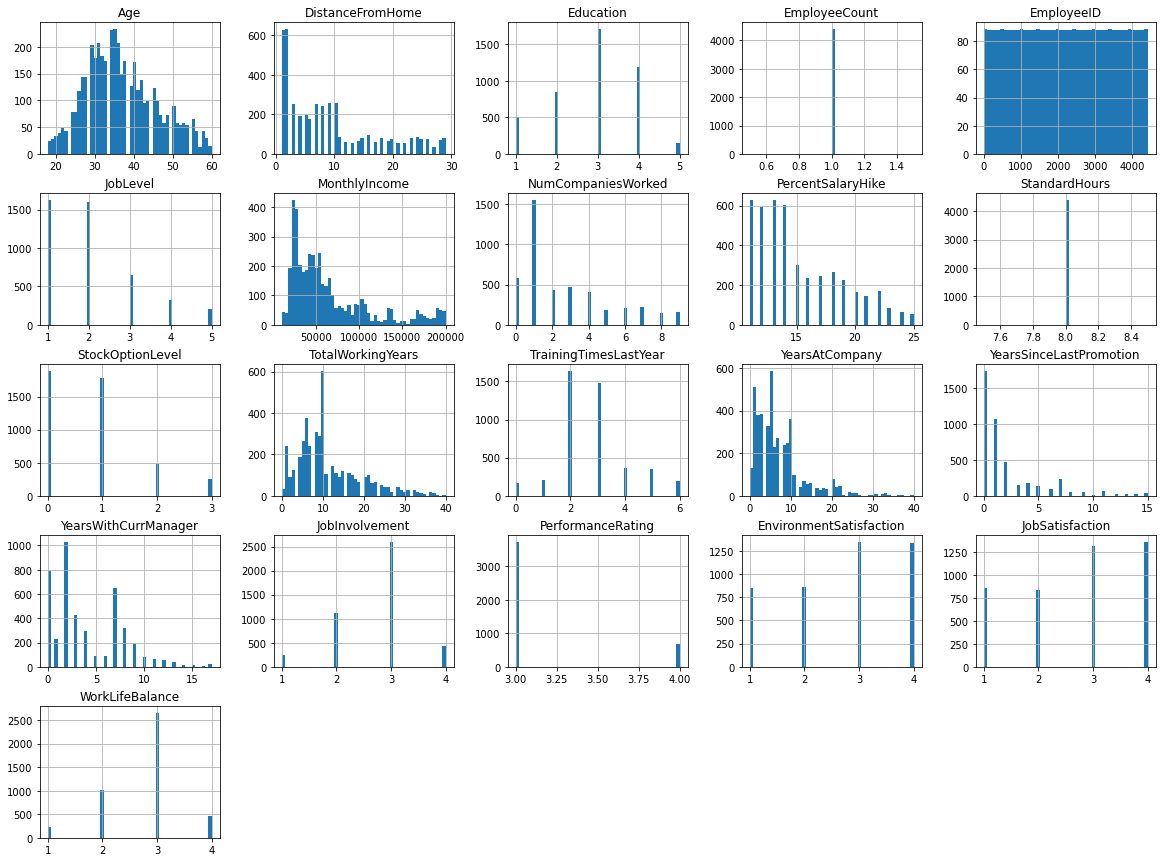

In [19]:
dataset_without_in_out.hist(bins=50, figsize=(20,15))
plt.show()

#### Remarques :

* `EmployeeID` n'a pas d'intéret dans notre jeu de données. Cette colonne est un simple identifiant, un algorithme de machine learning n'en tirera rien.


* On peut voir ici que `EmployeeCount` ne semble pas être une donnée pertinente. En effet l'ensemble des employées était présent en 2015, cela n'aura donc aucun impact sur la prédiction que l'on souhaite faire. Si l'ensemble des employées est "regroupé" sous une même valeurs, cela signifie que cette données est inutile pour notre modèle.


* Il en est de même pour la donnée `StandardHours`. Celle-ci ne semble avoir aucune pertinence puisque l'ensemble des employés ont tous le même nombre d'heures à effectuer au sein d'une journée.


* `PerformanceRating` possède deux "classes" bien distinctes. En effet l'ensemble des données sont regroupées sous deux valeurs : 3 et 4, il serait peut être intéressant de savoir si cette données à un impact direct sur l'attrition.


* Les colonnes `WorkLifeBalance` et `JobInvolvement` ont quasiment les mêmes historgrammes. Il en est de même pour `JobSatisfaction` et `EnvironmentSatisfaction`. Nous allons donc verifier si il existe des corrélations entre ces colonnes.


* Certaines données comme `YearSinceLastPromotion` & `DistanceFromHome` semblent intéressantes à étudier. En effet, on peut voir que beaucoup de personnes qui habitent loin de leur lieu de travail et beaucoup ont été promus récemment, ces données ont potentiellement un impact sur le turn over au sein de la société.


* La colonne `Age` semble ne pas descendre en dessous de 18 ans. Nous allons vérifier cela avec la colonne `Over18` qui est quand à elle une donnée qualitative. Si c'est le cas, alors nous pourrons supprimer la colonne `Over18` car elle ne servirait à rien pour notre modèle.


* Les échelles sont très différentes d'une feature à l'autre. Un scaling sera nécessaire pour obtenir un modèle performant.

Nous pouvons donc supprimer les colonnes `EmployeeID`, `EmployeeCount` et `StandardHours` car elles n'ont pas d'intérêt :

In [20]:
dataset_without_in_out.drop("EmployeeID", axis=1, inplace=True) 
dataset_without_in_out.drop("EmployeeCount", axis=1, inplace=True) 
dataset_without_in_out.drop("StandardHours", axis=1, inplace=True) 

Vérifions maintenant la colonne `Over18` :

In [21]:
dataset_without_in_out["Over18"].value_counts()

Y    4410
Name: Over18, dtype: int64

Nous avons vu juste, les 4410 valeurs sont toutes les mêmes dans cette colonne. Nous pouvons la supprimer.

In [22]:
dataset_without_in_out.drop("Over18", axis=1, inplace=True) 

In [23]:
dataset_without_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

#### C.3 Étude des corrélations

Dans cette partie nous allons voir qu'elles données sont potentiellement corrélées à l'aide de différentes méthodes.

Nous avons pu voir lors de notre exploration de données que certaines d'entres elles semblaient liées, nous allons donc déterminer si c'est le cas.

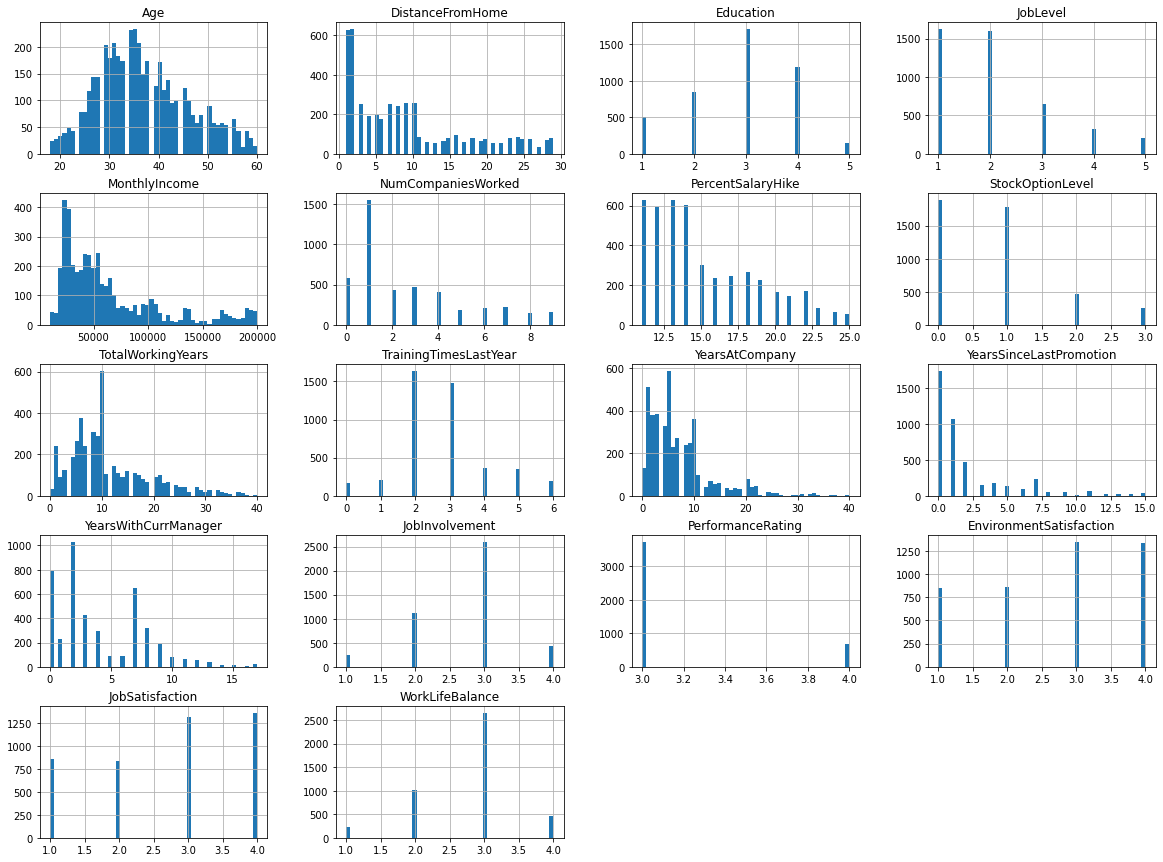

In [24]:
dataset_without_in_out.hist(bins=50, figsize=(20,15))
plt.show()

Au vus des histogrammes nous pensons que les données suivantes sont corrolées :
* `YearsSinceLastPromotion` & `MonthlyIncome`
* `WorkLifeBalance` & `JobInvolvement`
* `JobSatisfaction` & `EnvironmentSatisfaction`
Pour l savoir nous allons tout simplement utilisé la fonction de corrélation 

In [25]:
corr_matrix = dataset_without_in_out.corr() 
corr_matrix["MonthlyIncome"]

Age                       -0.044314
DistanceFromHome          -0.021607
Education                  0.006410
JobLevel                   0.047316
MonthlyIncome              1.000000
NumCompaniesWorked        -0.020726
PercentSalaryHike          0.004325
StockOptionLevel           0.026930
TotalWorkingYears         -0.033787
TrainingTimesLastYear      0.050112
YearsAtCompany             0.000995
YearsSinceLastPromotion    0.065219
YearsWithCurrManager       0.024304
JobInvolvement             0.023346
PerformanceRating          0.016093
EnvironmentSatisfaction   -0.006006
JobSatisfaction            0.005063
WorkLifeBalance            0.003572
Name: MonthlyIncome, dtype: float64

In [26]:
corr_matrix = dataset_without_in_out.corr() 
corr_matrix["WorkLifeBalance"]

Age                       -0.021297
DistanceFromHome           0.008000
Education                 -0.006406
JobLevel                  -0.027664
MonthlyIncome              0.003572
NumCompaniesWorked        -0.008714
PercentSalaryHike         -0.040601
StockOptionLevel          -0.022886
TotalWorkingYears          0.001119
TrainingTimesLastYear     -0.015817
YearsAtCompany             0.014704
YearsSinceLastPromotion    0.009234
YearsWithCurrManager       0.007456
JobInvolvement            -0.019424
PerformanceRating         -0.023067
EnvironmentSatisfaction    0.024379
JobSatisfaction           -0.019104
WorkLifeBalance            1.000000
Name: WorkLifeBalance, dtype: float64

In [27]:
corr_matrix = dataset_without_in_out.corr() 
corr_matrix["Age"]

Age                        1.000000
DistanceFromHome           0.006963
Education                 -0.035706
JobLevel                  -0.002884
MonthlyIncome             -0.044314
NumCompaniesWorked         0.299243
PercentSalaryHike         -0.033137
StockOptionLevel          -0.031753
TotalWorkingYears          0.680661
TrainingTimesLastYear     -0.027308
YearsAtCompany             0.311309
YearsSinceLastPromotion    0.216513
YearsWithCurrManager       0.202089
JobInvolvement             0.018196
PerformanceRating         -0.025563
EnvironmentSatisfaction    0.010089
JobSatisfaction           -0.003086
WorkLifeBalance           -0.021297
Name: Age, dtype: float64

Nous pouvons déjà voir ci-dessus que finalement ces données ne semblent pas corrélées, en effet :
* `YearsSinceLastPromotion` & `MonthlyIncome` : ne sont corrélées qu'à 0.065219, cependant c'est le taux de corrélation le plus élevé parmis les attributs (de cette corrélation)
* `WorkLifeBalance` & `JobInvolvement` : ne sont pas du tout corrélé car nous avons une sortie de -0.019424
* `JobSatisfaction` & `EnvironmentSatisfaction`  : de même pour ces attributs qui n'ont que -0.006550 de corrélation

Pour aller plus loin nous pouvons essayer de tracer une graphiques entre les différents attributs selectionnés.

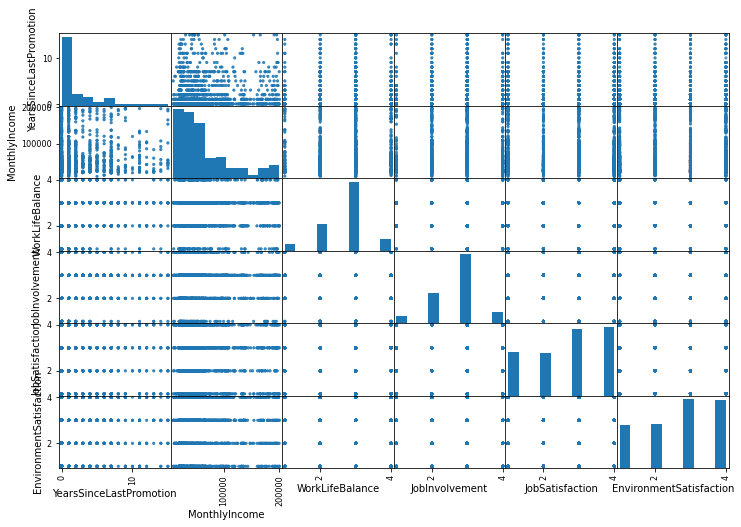

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["YearsSinceLastPromotion", "MonthlyIncome", "WorkLifeBalance",
              "JobInvolvement", "JobSatisfaction", "EnvironmentSatisfaction"]
CorrelationGraph = scatter_matrix(dataset_without_in_out[attributes], figsize=(12, 8))

Nous pouvons aussi créer des graphiques pour les attributs qui nous semblent corrélés deux à deux :

No handles with labels found to put in legend.


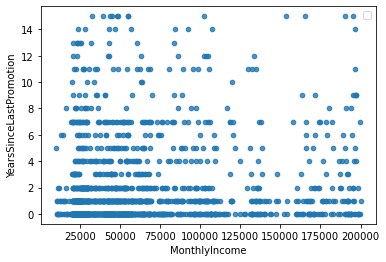

In [29]:
dataset_without_in_out.plot(kind="scatter", x="MonthlyIncome", y="YearsSinceLastPromotion", alpha=0.4,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


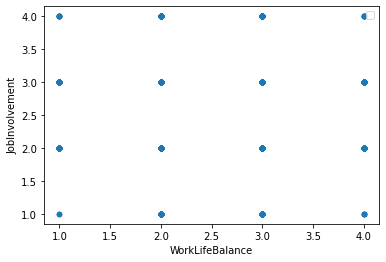

In [30]:
dataset_without_in_out.plot(kind="scatter", x="WorkLifeBalance", y="JobInvolvement", alpha=0.4,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


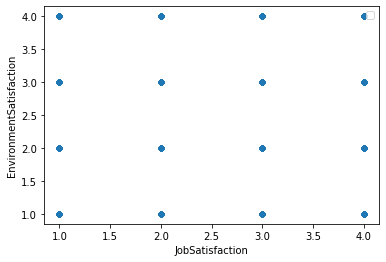

In [31]:
dataset_without_in_out.plot(kind="scatter", x="JobSatisfaction", y="EnvironmentSatisfaction", alpha=0.4,
    sharex=False)
plt.legend()

On peut voir que les graphiques ne nous donnent malheuresement aucunes nouvelles informations, sauf le premier graphique qui semble nous indiquer que les personnes ayant un salire "bas" ont recemment eu une promotion.

En effet on voit que le nombre de promotion est élevé pour une majeur partie des personnes ayant le plus fabiel salaire.

No handles with labels found to put in legend.


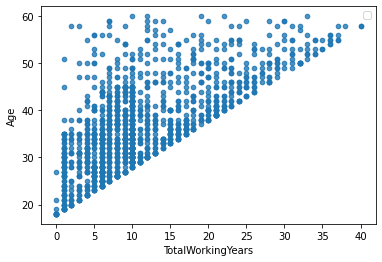

In [32]:
dataset_without_in_out.plot(kind="scatter", x="TotalWorkingYears", y="Age", alpha=0.4,
    sharex=False)
plt.legend()

In [33]:
dataset_without_in_out['YearsSinceLastPromotion']

0       0
1       1
2       0
3       7
4       0
       ..
4405    0
4406    0
4407    1
4408    7
4409    3
Name: YearsSinceLastPromotion, Length: 4410, dtype: int64

# TEST Correlation

In [34]:
# import statsmodels.api
# result = statsmodels.formula.api.ols('YearsSinceLastPromotion ~ MonthlyIncome', data = dataset_without_in_out).fit()
# table = statsmodels.api.anova_lm(result)

In [35]:
corr_matrix = dataset_without_in_out.corr(method='spearman') 
corr_matrix_2 = dataset_without_in_out.corr(method='kendall') 

corr_matrix.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Age,1.0,-0.0049,-0.029,-0.013,-0.026,0.35,-0.034,-0.014,0.66,-0.044,0.25,0.17,0.19,0.018,-0.03,0.0098,-0.0034,-0.0039
DistanceFromHome,-0.0049,1.0,-0.0053,-0.028,-0.025,-0.036,0.039,0.0014,-8.2e-05,0.0072,0.018,0.0086,0.034,-0.013,0.042,0.021,-0.02,0.0095
Education,-0.029,-0.0053,1.0,0.047,-0.00035,-0.012,-0.031,-0.0075,0.012,0.031,0.0039,0.015,0.018,-0.0099,-0.029,-0.048,0.0039,-0.013
JobLevel,-0.013,-0.028,0.047,1.0,0.048,-0.01,0.035,-0.03,-0.031,-0.041,-0.044,-0.043,-0.04,-0.018,0.0074,-0.03,-0.023,-0.028
MonthlyIncome,-0.026,-0.025,-0.00035,0.048,1.0,-0.042,0.013,0.042,-0.019,0.016,0.029,0.06,0.026,0.017,0.013,-0.0055,-0.0024,0.028
NumCompaniesWorked,0.35,-0.036,-0.012,-0.01,-0.042,1.0,0.015,0.045,0.32,-0.013,-0.17,-0.067,-0.14,0.022,-0.00061,0.0066,-0.052,0.0079
PercentSalaryHike,-0.034,0.039,-0.031,0.035,0.013,0.015,1.0,0.025,-0.036,-0.036,-0.042,-0.038,-0.047,-0.015,0.63,-0.0055,0.025,-0.042
StockOptionLevel,-0.014,0.0014,-0.0075,-0.03,0.042,0.045,0.025,1.0,0.014,-0.067,-0.00079,0.0044,6.2e-05,0.013,-0.029,-0.0031,0.037,-0.0066
TotalWorkingYears,0.66,-8.2e-05,0.012,-0.031,-0.019,0.32,-0.036,0.014,1.0,-0.041,0.59,0.33,0.49,-0.0023,-0.012,-0.013,-0.012,0.003
TrainingTimesLastYear,-0.044,0.0072,0.031,-0.041,0.016,-0.013,-0.036,-0.067,-0.041,1.0,-0.014,0.00058,-0.015,-0.0046,-0.027,0.017,-0.02,-0.017


In [36]:
corr_matrix_2.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
Age,1.0,-0.0037,-0.021,-0.0097,-0.018,0.26,-0.025,-0.011,0.5,-0.033,0.19,0.13,0.14,0.014,-0.025,0.0072,-0.0025,-0.0031
DistanceFromHome,-0.0037,1.0,-0.0042,-0.022,-0.018,-0.027,0.028,0.001,7.8e-05,0.0056,0.013,0.0068,0.025,-0.011,0.035,0.016,-0.015,0.0074
Education,-0.021,-0.0042,1.0,0.039,-0.00012,-0.0096,-0.024,-0.0067,0.0094,0.026,0.0031,0.012,0.014,-0.0087,-0.026,-0.04,0.0032,-0.011
JobLevel,-0.0097,-0.022,0.039,1.0,0.037,-0.0081,0.027,-0.027,-0.024,-0.035,-0.034,-0.035,-0.032,-0.016,0.0068,-0.025,-0.02,-0.024
MonthlyIncome,-0.018,-0.018,-0.00012,0.037,1.0,-0.03,0.0088,0.033,-0.013,0.011,0.021,0.044,0.019,0.013,0.011,-0.0045,-0.0017,0.022
NumCompaniesWorked,0.26,-0.027,-0.0096,-0.0081,-0.03,1.0,0.011,0.037,0.23,-0.011,-0.13,-0.052,-0.11,0.018,-0.00054,0.0049,-0.042,0.0068
PercentSalaryHike,-0.025,0.028,-0.024,0.027,0.0088,0.011,1.0,0.02,-0.026,-0.028,-0.03,-0.029,-0.035,-0.013,0.54,-0.0045,0.02,-0.035
StockOptionLevel,-0.011,0.001,-0.0067,-0.027,0.033,0.037,0.02,1.0,0.011,-0.058,-0.00051,0.0038,0.00017,0.012,-0.028,-0.0026,0.032,-0.0058
TotalWorkingYears,0.5,7.8e-05,0.0094,-0.024,-0.013,0.23,-0.026,0.011,1.0,-0.032,0.5,0.26,0.4,-0.002,-0.01,-0.01,-0.0095,0.0022
TrainingTimesLastYear,-0.033,0.0056,0.026,-0.035,0.011,-0.011,-0.028,-0.058,-0.032,1.0,-0.01,0.0005,-0.012,-0.004,-0.025,0.014,-0.017,-0.015


In [37]:
dataset_without_in_out

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,60290,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,26790,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,37020,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,23980,...,10.0,2,9,7,8,2,3,4.0,1.0,3.0


#### C.4 Étude des horaires d'entrées / sorties

Les données d'entrées / sorties fournies par les badgeuses de l'entreprise sont assez indigestes et n'ont pas de valeur significative pour un algorithme de machine learning dans leur forme actuelle. Nous avons donc décidé d'essayer de faire une moyenne du nombre d'heure travaillées, par jour, d'un employé entre le `01/01/2015` et le `31/12/2015`

Nous commencons par récuperer un tableau contenant uniquement les données d'entrées / sorties depuis notre `dataset`

In [38]:
dataset_with_in_out = dataset.drop(dataset.iloc[:, 0:29],1)

Nous allons maintenant transformer toutes ces données étant de type `string` en `datetime`

In [39]:
dataset_with_in_out = dataset_with_in_out.apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

Il est maintenant nécessaire de "soustraire" les sorties des entrées des employés pour obtenir le temps qu'ils ont passés, par jour, sur leur lieu de travail

In [40]:
import datetime as dt
import pandas as pd

nombre_de_jour = int(dataset_with_in_out.shape[1] / 2)

datetime_in = dataset_with_in_out.drop(dataset_with_in_out.iloc[:, nombre_de_jour:],1)
datetime_out = dataset_with_in_out.drop(dataset_with_in_out.iloc[:, :nombre_de_jour],1)

datetime_in.columns = datetime_in.columns.str.rstrip("_in")
datetime_out.columns = datetime_out.columns.str.rstrip("_out")

datetime_sub = datetime_out.subtract(datetime_in, fill_value=0)

Nous pouvons maintenant faire la moyenne du temps que chaque employés à passé sur son lieu de travail par jour entre le `01/01/2015` et le `31/12/2015`, en secondes.

In [41]:
datetime_mean = datetime_sub.mean(axis = 1)
datetime_mean = datetime_mean.dt.total_seconds()
datetime_mean

0       26545.142241
1       27788.288136
2       25247.665289
3       25897.242553
4       28822.228571
            ...     
4405    30680.197531
4406    21934.634855
4407    27743.874459
4408    34173.340249
4409    25160.211207
Length: 4410, dtype: float64

Les données d'entrées et de sorties sont maintenant beaucoup plus exploitable par un algorithme de machine learning. Nous allons donc les remettres dans notre `dataset`.

In [42]:
final_dataset = dataset_without_in_out
final_dataset["MoyenneInOut"] = datetime_mean

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

#### C.5 Création des jeux d'entrainement et de test

In [43]:
final_dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,...,6,1,0,0,3,3,3.0,4.0,2.0,26545.142241
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,...,3,5,1,4,2,4,3.0,2.0,4.0,27788.288136
2,32,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,...,2,5,0,3,3,3,2.0,2.0,1.0,25247.665289
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,...,5,8,7,5,2,3,4.0,4.0,3.0,25897.242553
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,...,2,6,0,4,3,3,4.0,1.0,3.0,28822.228571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,60290,...,5,3,0,2,3,3,4.0,1.0,3.0,30680.197531
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,26790,...,2,3,0,2,2,3,4.0,4.0,3.0,21934.634855
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,37020,...,4,4,1,2,3,4,1.0,3.0,3.0,27743.874459
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Laboratory Technician,23980,...,2,9,7,8,2,3,4.0,1.0,3.0,34173.340249


Nous allons découper notre jeu de données en deux avec une séparation de 80%.

* Le `train_set` contiendra 80% de nos données. Le modèle de machine learning s'entrainera sur ces données.
* Le `test_set` contiendra 20% de nos données. Le modèle de machine sera testé sur ces données.

Nous allons  faire un échantillonage stratifié sur la donnée `Attrition` pour que le `train_set` et le `test_set` possèdent les mêmes proportions de personnes qui sont restées et qui sont parties de l'entreprise.

Vérifions les proportions :

In [44]:
final_dataset['Attrition'] = final_dataset['Attrition'].replace(['Yes','No'],[1,0])

<AxesSubplot:>

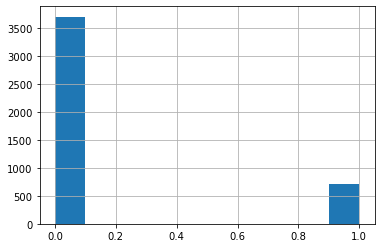

In [45]:
final_dataset["Attrition"].hist()

On peut maintenant utiliser [`StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) pour échantillonner le jeu de données en respectant notre contrainte :

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #initialise le split

for train_index, test_index in split.split(final_dataset, final_dataset["Attrition"]): 
    train_set = dataset_without_in_out.loc[train_index]
    test_set = dataset_without_in_out.loc[test_index]

Nous vérifions maintenant si les proportions ont bien été respectées :

<AxesSubplot:>

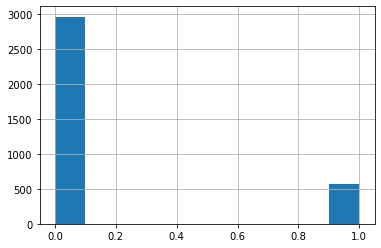

In [47]:
train_set["Attrition"].hist()

<AxesSubplot:>

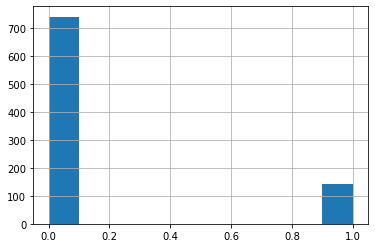

In [48]:
test_set["Attrition"].hist()

Nos histrogrammes semblent avoir les mêmes proportions. Notre stratification a donc bien fonctionnée.

### D. Préparation des données d'entrainement pour les algorithmes de ML

Nous allons commencer par scinder le jeu de données d'entrainement. D'une part nous aurons, les variables-cibles, ou "labels", notées $Y$ et de l'autre, les "features" notées $X$.

In [49]:
train_set_features = train_set.drop("Attrition", axis=1)
train_set_labels = train_set["Attrition"].copy()

#### D.1 Identifications des données numériques et qualitative

In [50]:
train_set_features_num = train_set_features.select_dtypes(include=[np.number]) # recupère les données des colonnes numerique uniquement
train_set_features_cat = train_set_features.select_dtypes(exclude=[np.number]) # recupère les donnée

train_set_features_num = list(train_set_features_num)
train_set_features_cat = list(train_set_features_cat)

#### D.2  Pipeline des données qualitatives

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder())
])

#### D.2  Pipeline des données numériques

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imput', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#### D.3  Pipeline de préparation des données

In [54]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_set_features_num),
        ("cat", cat_pipeline, train_set_features_cat),
    ])

In [55]:
train_set_features_prepared = full_pipeline.fit_transform(train_set_features)

In [56]:
train_set_features_cat = full_pipeline.named_transformers_['cat']['cat_encoder'].get_feature_names(train_set_features_cat)
train_set_features_cat = list(train_set_features_cat)

train_set_features_prepared_pd = pd.DataFrame(
    train_set_features_prepared,
    columns = train_set_features_num + train_set_features_cat)

train_set_features_prepared_pd.head().style

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.463140,-1.016618,1.055180,-0.969757,-0.259638,-0.679818,-0.341374,-0.939036,-0.160786,-0.615667,0.508815,-0.677208,1.098882,1.797989,-0.432065,-0.661977,0.263919,0.337770,0.154623,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,-0.306868,-1.016618,-1.876060,-0.068228,-0.801808,0.119915,2.102113,-0.939036,-0.676822,0.162575,-1.149782,-0.677208,-1.146292,0.381440,2.314467,0.257856,1.169667,0.337770,-0.460246,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,-1.736884,0.087413,-0.898980,-0.969757,-0.235080,-0.679818,-0.884371,0.234094,-1.321867,-0.615667,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,0.257856,-0.641828,0.337770,-1.284879,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.966876,-0.280597,0.078100,-0.068228,-0.742531,-0.679818,-0.341374,-0.939036,-1.321867,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,0.337770,-1.059293,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.353139,-1.016618,1.055180,-0.068228,2.698904,-0.279952,-0.341374,0.234094,-0.031777,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,-1.094505,-1.219655,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


<AxesSubplot:>

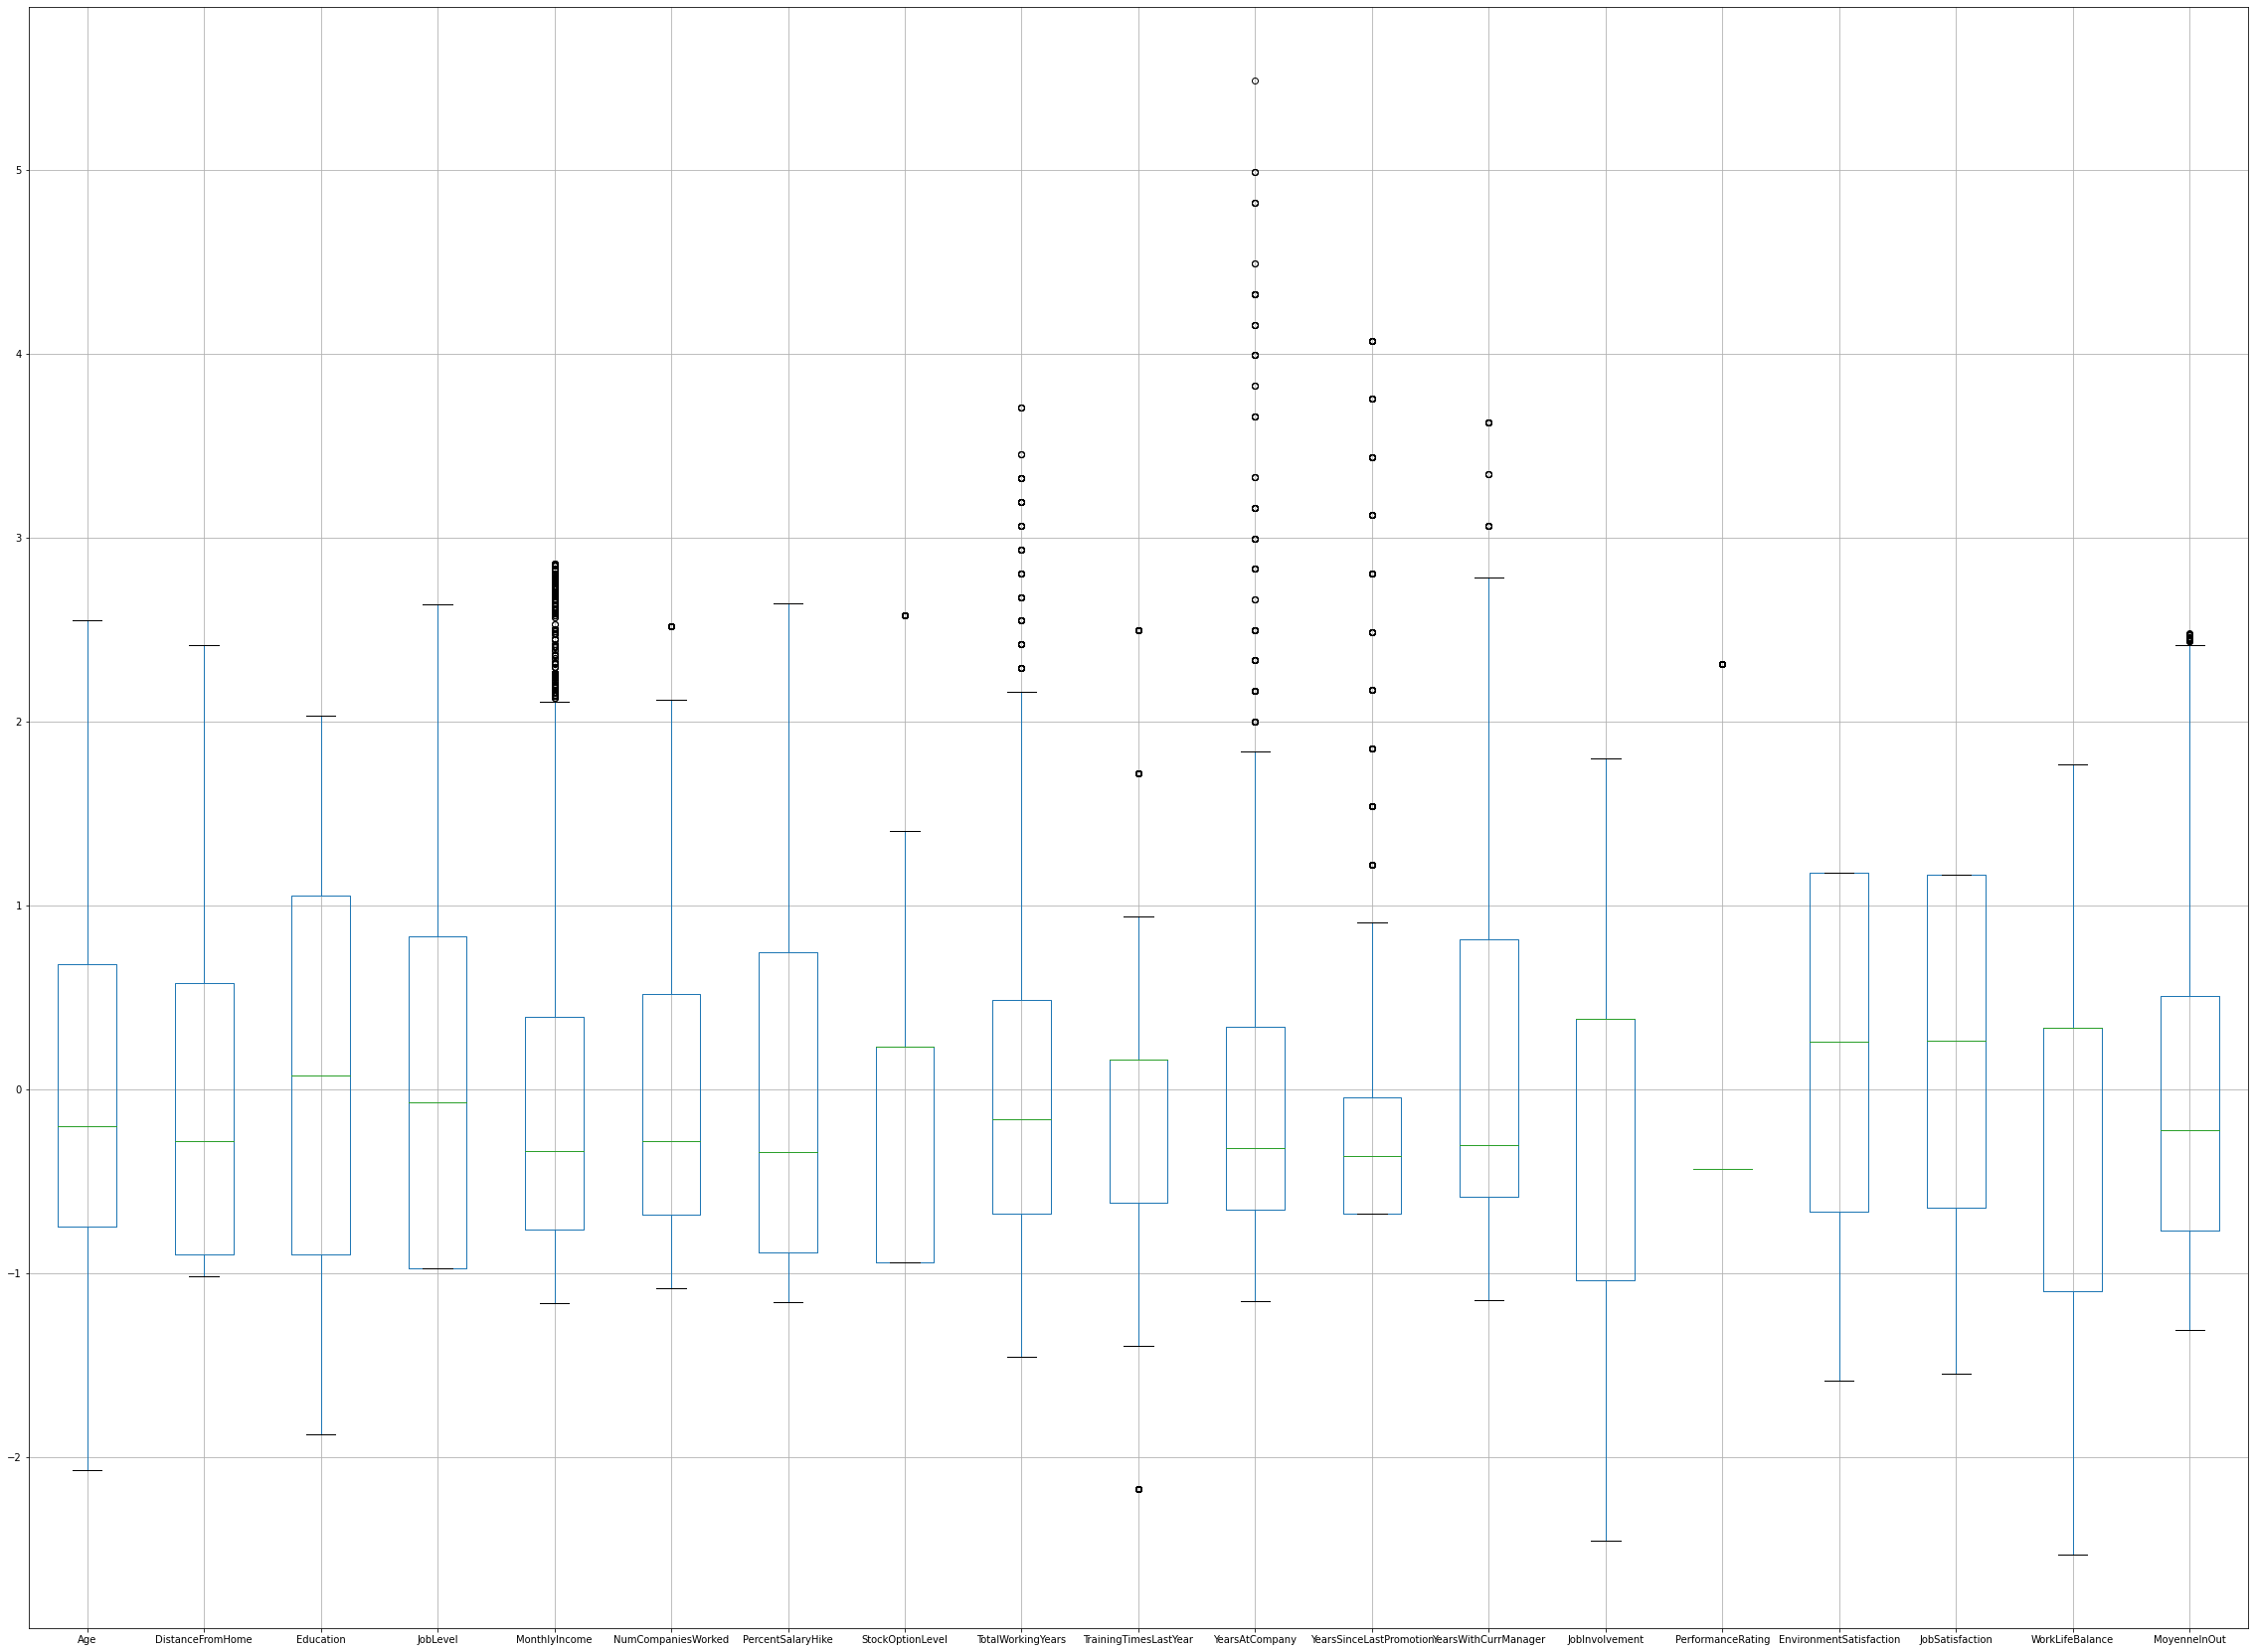

In [57]:
train_set_features_prepared_pd.boxplot(train_set_features_num, figsize=(40,30))

# TEST

In [58]:
corr_matrix = train_set_features_prepared_pd.corr(method='spearman') 
corr_matrix_2 = train_set_features_prepared_pd.corr(method='kendall') 

corr_matrix.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.0,0.0034,-0.034,-0.01,-0.023,0.35,-0.034,-0.026,0.66,-0.058,0.24,0.17,0.18,0.02,-0.028,0.015,0.004,0.0021,-0.005,0.00049,-0.015,0.013,-0.0091,0.022,-0.019,-0.046,-0.017,-0.031,0.027,-0.01,0.049,-0.048,0.017,0.022,-0.0043,-0.0037,0.004,0.0022,0.024,-0.032
DistanceFromHome,0.0034,1.0,-0.016,-0.025,-0.019,-0.041,0.04,0.013,-0.0044,0.015,0.013,0.0052,0.029,-0.032,0.039,0.022,-0.019,0.0088,0.014,-0.031,0.026,-0.0019,-0.032,-0.0033,0.018,0.018,0.0025,0.019,-0.0087,-0.022,-0.0015,-0.028,-0.00039,0.059,-0.052,0.012,-0.013,-0.011,-0.0067,0.022
Education,-0.034,-0.016,1.0,0.039,-0.0068,-0.0086,-0.034,-0.0091,0.022,0.038,0.012,0.028,0.026,-0.016,-0.035,-0.055,0.005,-0.021,0.0023,-0.0011,0.014,-0.011,0.012,-0.0056,0.00038,-0.026,0.003,-0.0032,-0.024,0.057,0.0045,-0.026,0.054,-0.076,0.036,-0.0059,0.046,-0.0017,0.0059,0.031
JobLevel,-0.01,-0.025,0.039,1.0,0.036,-0.013,0.041,-0.034,-0.031,-0.031,-0.043,-0.041,-0.039,-0.024,0.019,-0.029,-0.019,-0.018,-0.0084,-0.033,-0.0052,0.026,0.021,-0.043,0.035,0.0094,0.014,0.034,-0.046,0.0066,0.0051,0.03,0.026,-0.035,0.029,-0.00095,0.012,0.011,-0.014,-0.035
MonthlyIncome,-0.023,-0.019,-0.0068,0.036,1.0,-0.041,0.009,0.053,-0.017,0.019,0.019,0.054,0.019,0.022,0.0051,-0.004,-0.0013,0.027,-0.017,0.077,-0.055,-0.0034,-0.021,0.056,-0.049,-0.0069,0.015,-0.047,0.021,0.011,-0.016,-0.023,-0.023,0.017,-0.0094,0.046,0.0088,-0.0094,0.0095,-0.04
NumCompaniesWorked,0.35,-0.041,-0.0086,-0.013,-0.041,1.0,0.0054,0.04,0.32,-0.018,-0.17,-0.064,-0.15,0.021,-0.0071,0.022,-0.052,-0.012,-0.02,0.0027,-0.035,0.028,-0.042,0.05,-0.033,-0.028,0.0026,0.0035,-0.011,0.0081,0.016,0.02,0.037,-0.0016,-0.004,0.0066,0.019,-0.022,-0.017,-0.0041
PercentSalaryHike,-0.034,0.04,-0.034,0.041,0.009,0.0054,1.0,0.014,-0.042,-0.033,-0.048,-0.034,-0.049,-0.022,0.63,-0.0017,0.025,-0.038,0.029,0.035,-0.0074,-0.017,-0.031,0.029,-0.016,-0.011,-0.013,-0.022,0.038,0.026,-0.031,0.025,-0.033,0.034,-0.0057,-0.01,-0.022,0.003,-0.044,0.054
StockOptionLevel,-0.026,0.013,-0.0091,-0.034,0.053,0.04,0.014,1.0,0.0084,-0.059,0.0021,0.0091,0.0035,0.0047,-0.036,0.0006,0.045,0.0021,-0.014,0.0079,-0.017,0.0093,0.014,-0.028,0.023,0.003,-0.046,-0.0097,0.068,-0.00063,-0.022,0.01,-0.025,0.0097,-0.081,0.029,-0.011,0.019,0.026,-0.026
TotalWorkingYears,0.66,-0.0044,0.022,-0.031,-0.017,0.32,-0.042,0.0084,1.0,-0.053,0.58,0.32,0.48,-0.0095,-0.013,-0.0073,-0.0079,0.0077,-0.014,-0.028,-0.0081,0.025,-0.048,0.062,-0.042,-0.062,-0.0024,-0.013,0.015,-0.043,0.057,-0.017,0.034,0.018,-0.0048,-0.0069,0.018,-0.006,0.022,-0.068
TrainingTimesLastYear,-0.058,0.015,0.038,-0.031,0.019,-0.018,-0.033,-0.059,-0.053,1.0,-0.024,0.003,-0.022,-0.014,-0.028,0.036,-0.018,-0.017,-0.035,0.055,-0.016,-0.023,-0.027,0.004,0.008,-0.027,0.033,-0.0017,-0.0055,-0.054,0.012,-0.036,-0.033,-0.031,-0.014,-0.011,0.024,-0.017,0.07,0.032


In [59]:
train_set_labels_pd = pd.DataFrame(train_set_labels)
result = train_set_features_prepared_pd

#result.extend(train_set_labels_pd)

# print(train_set_labels_pd.shape)
# print(train_set_features_prepared_pd.shape)
# print(result.shape)

print(result.info())
print(train_set_labels_pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                3528 non-null   float64
 1   DistanceFromHome                   3528 non-null   float64
 2   Education                          3528 non-null   float64
 3   JobLevel                           3528 non-null   float64
 4   MonthlyIncome                      3528 non-null   float64
 5   NumCompaniesWorked                 3528 non-null   float64
 6   PercentSalaryHike                  3528 non-null   float64
 7   StockOptionLevel                   3528 non-null   float64
 8   TotalWorkingYears                  3528 non-null   float64
 9   TrainingTimesLastYear              3528 non-null   float64
 10  YearsAtCompany                     3528 non-null   float64
 11  YearsSinceLastPromotion            3528 non-null   float

In [60]:
corr_matrix_test = result.corr(method='spearman') 
corr_matrix__test_2 = result.corr(method='kendall') 

corr_matrix_test.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
Age,1.0,0.0034,-0.034,-0.01,-0.023,0.35,-0.034,-0.026,0.66,-0.058,0.24,0.17,0.18,0.02,-0.028,0.015,0.004,0.0021,-0.005,0.00049,-0.015,0.013,-0.0091,0.022,-0.019,-0.046,-0.017,-0.031,0.027,-0.01,0.049,-0.048,0.017,0.022,-0.0043,-0.0037,0.004,0.0022,0.024,-0.032
DistanceFromHome,0.0034,1.0,-0.016,-0.025,-0.019,-0.041,0.04,0.013,-0.0044,0.015,0.013,0.0052,0.029,-0.032,0.039,0.022,-0.019,0.0088,0.014,-0.031,0.026,-0.0019,-0.032,-0.0033,0.018,0.018,0.0025,0.019,-0.0087,-0.022,-0.0015,-0.028,-0.00039,0.059,-0.052,0.012,-0.013,-0.011,-0.0067,0.022
Education,-0.034,-0.016,1.0,0.039,-0.0068,-0.0086,-0.034,-0.0091,0.022,0.038,0.012,0.028,0.026,-0.016,-0.035,-0.055,0.005,-0.021,0.0023,-0.0011,0.014,-0.011,0.012,-0.0056,0.00038,-0.026,0.003,-0.0032,-0.024,0.057,0.0045,-0.026,0.054,-0.076,0.036,-0.0059,0.046,-0.0017,0.0059,0.031
JobLevel,-0.01,-0.025,0.039,1.0,0.036,-0.013,0.041,-0.034,-0.031,-0.031,-0.043,-0.041,-0.039,-0.024,0.019,-0.029,-0.019,-0.018,-0.0084,-0.033,-0.0052,0.026,0.021,-0.043,0.035,0.0094,0.014,0.034,-0.046,0.0066,0.0051,0.03,0.026,-0.035,0.029,-0.00095,0.012,0.011,-0.014,-0.035
MonthlyIncome,-0.023,-0.019,-0.0068,0.036,1.0,-0.041,0.009,0.053,-0.017,0.019,0.019,0.054,0.019,0.022,0.0051,-0.004,-0.0013,0.027,-0.017,0.077,-0.055,-0.0034,-0.021,0.056,-0.049,-0.0069,0.015,-0.047,0.021,0.011,-0.016,-0.023,-0.023,0.017,-0.0094,0.046,0.0088,-0.0094,0.0095,-0.04
NumCompaniesWorked,0.35,-0.041,-0.0086,-0.013,-0.041,1.0,0.0054,0.04,0.32,-0.018,-0.17,-0.064,-0.15,0.021,-0.0071,0.022,-0.052,-0.012,-0.02,0.0027,-0.035,0.028,-0.042,0.05,-0.033,-0.028,0.0026,0.0035,-0.011,0.0081,0.016,0.02,0.037,-0.0016,-0.004,0.0066,0.019,-0.022,-0.017,-0.0041
PercentSalaryHike,-0.034,0.04,-0.034,0.041,0.009,0.0054,1.0,0.014,-0.042,-0.033,-0.048,-0.034,-0.049,-0.022,0.63,-0.0017,0.025,-0.038,0.029,0.035,-0.0074,-0.017,-0.031,0.029,-0.016,-0.011,-0.013,-0.022,0.038,0.026,-0.031,0.025,-0.033,0.034,-0.0057,-0.01,-0.022,0.003,-0.044,0.054
StockOptionLevel,-0.026,0.013,-0.0091,-0.034,0.053,0.04,0.014,1.0,0.0084,-0.059,0.0021,0.0091,0.0035,0.0047,-0.036,0.0006,0.045,0.0021,-0.014,0.0079,-0.017,0.0093,0.014,-0.028,0.023,0.003,-0.046,-0.0097,0.068,-0.00063,-0.022,0.01,-0.025,0.0097,-0.081,0.029,-0.011,0.019,0.026,-0.026
TotalWorkingYears,0.66,-0.0044,0.022,-0.031,-0.017,0.32,-0.042,0.0084,1.0,-0.053,0.58,0.32,0.48,-0.0095,-0.013,-0.0073,-0.0079,0.0077,-0.014,-0.028,-0.0081,0.025,-0.048,0.062,-0.042,-0.062,-0.0024,-0.013,0.015,-0.043,0.057,-0.017,0.034,0.018,-0.0048,-0.0069,0.018,-0.006,0.022,-0.068
TrainingTimesLastYear,-0.058,0.015,0.038,-0.031,0.019,-0.018,-0.033,-0.059,-0.053,1.0,-0.024,0.003,-0.022,-0.014,-0.028,0.036,-0.018,-0.017,-0.035,0.055,-0.016,-0.023,-0.027,0.004,0.008,-0.027,0.033,-0.0017,-0.0055,-0.054,0.012,-0.036,-0.033,-0.031,-0.014,-0.011,0.024,-0.017,0.07,0.032


# 2. Choix d'un modèle de machine learning

# Test SGDC Classifier

In [61]:
test_set_features = test_set.drop("Attrition", axis=1)
test_set_labels = test_set["Attrition"].copy()
test_set_features_prepared = full_pipeline.transform(test_set_features)

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10, random_state=42)
sgd_clf.fit(train_set_features_prepared_pd,train_set_labels_pd)

C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=10, random_state=42)

In [63]:
sgd_clf.predict(test_set_features_prepared)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [64]:
sgd_clf.score(test_set_features_prepared, test_set_labels)

0.7766439909297053

In [65]:
train_set_features_prepared_pd

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.463140,-1.016618,1.05518,-0.969757,-0.259638,-0.679818,-0.341374,-0.939036,-0.160786,-0.615667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.306868,-1.016618,-1.87606,-0.068228,-0.801808,0.119915,2.102113,-0.939036,-0.676822,0.162575,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.736884,0.087413,-0.89898,-0.969757,-0.235080,-0.679818,-0.884371,0.234094,-1.321867,-0.615667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.966876,-0.280597,0.07810,-0.068228,-0.742531,-0.679818,-0.341374,-0.939036,-1.321867,0.162575,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.353139,-1.016618,1.05518,-0.068228,2.698904,-0.279952,-0.341374,0.234094,-0.031777,0.162575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,0.023135,1.314114,2.03226,-0.068228,0.067866,0.519781,-0.612873,0.234094,-0.418804,-1.393910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3524,-1.406880,2.295474,1.05518,0.833301,-0.761584,-0.679818,1.016119,0.234094,-1.321867,1.719060,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3525,-0.416870,-0.280597,-0.89898,-0.068228,-0.581425,2.119247,1.830614,1.407223,-0.418804,-0.615667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3526,-0.966876,0.210083,-0.89898,-0.068228,-0.141931,-0.279952,1.287617,0.234094,-0.805831,-0.615667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, test_set_features_prepared, test_set_labels, cv=3, scoring="accuracy")

C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.79931973, 0.77891156, 0.81972789])

In [67]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [68]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,train_set_features_prepared_pd,train_set_labels_pd, cv=3, scoring="accuracy")

array([0.84013605, 0.84693878, 0.82908163])

In [69]:
test_set_labels

3331    0
2050    1
1213    0
2355    0
2433    0
       ..
803     0
1426    1
1227    0
1036    0
4229    0
Name: Attrition, Length: 882, dtype: int64

# Test Perceptron

Maintenant que le pré-traitement des données est finis il nous faut choisir un modèle & l'entrainer afin de faire nos prédictions. 
Il existe différents modèle de classification :
* Logistic Regression
* SGDClassifier
* Support Vector Machine (SVM)
* Naive Bayes
* Decision Tree
* Random Forest
* Neural Networ

Bien sûr il serait illogique de tous les tester un par un, nous devons définir lesquels sont les plus adaptés à notre jeux de données.

Nous savons déjà que nous sommes sur un apprentissage supervisé.

On dispose déjà d’étiquettes sur nos données  et l'on cherche à classifier des nouvelles données. Le nombre de classes est connu. 

De plus notre jeux de données est assez petit 4410 enregistrement avec 29 attributs, on ne peut donc pas écarté certains algorithme en fonction de ce critère.

On a donc décidé d'explorer plusieurs pistes avec plusieurs algorithmes, étant quatre dans notre groupe nous avons choisi de nous répartir les tâches de façon à ce que chacun test un modèle de classification adapté à notre jeux de données. Ceux que nous avons choisi de tester son les suivants :
* Logistic Regression
* Random Forest Classifier
* KNeighbors Classifier
* Perceptron

In [70]:
###

In [181]:
from sklearn.linear_model import Perceptron

percep_dataset = Perceptron(random_state=42)
percep_dataset.fit(train_set_features_prepared, train_set_labels)

Perceptron(random_state=42)

In [182]:
percep_dataset.predict(test_set_features_prepared)

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [190]:
percep_dataset.score(train_set_features_prepared, train_set_labels)

0.7505668934240363

In [184]:
cross_val_score(percep_dataset, train_set_features_prepared, train_set_labels, cv=3, scoring="accuracy")

array([0.7670068 , 0.74234694, 0.81122449])

In [177]:
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(percep_dataset,train_set_features_prepared,train_set_labels, cv=3)

In [178]:
from sklearn.metrics import confusion_matrix

confusion_me = confusion_matrix(test_set_labels, y_test_pred)

confuse_me_pd = pd.DataFrame(data=confusion_me)
confuse_me_pd.head()

ValueError: Found input variables with inconsistent numbers of samples: [882, 3528]

In [179]:
y_test_perfect_predictions = test_set_labels
perfect_confusion_me = confusion_matrix(test_set_labels, y_test_perfect_predictions)

confuse_me_pd = pd.DataFrame(data=perfect_confusion_me)
confuse_me_pd.head()

,0,1
0,740,0
1,0,142


In [180]:
from sklearn.metrics import precision_score, recall_score
precision_score(test_set_labels, y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [882, 3528]

In [78]:
recall_score(test_set_labels, y_test_pred)

0.23943661971830985

In [79]:
from sklearn.metrics import f1_score
f1_score(test_set_labels, y_test_pred)

0.26053639846743293

In [80]:
percep_dataset.predict(test_set_features_prepared)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [81]:
test_set_features_prepared

array([[ 1.7831542 , -1.01661786, -1.87605989, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57314112, -0.89394778,  1.05517983, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34314944, -1.01661786,  1.05517983, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.85687434,  0.82343335, -0.89897998, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46313993, -0.7712777 ,  0.07809992, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.90314468,  0.57809318,  0.07809992, ...,  0.        ,
         1.        ,  0.        ]])

In [82]:
# feature_importances = percep_dataset.best_estimator_.feature_importances_
# feature_importances

# cat_encoder = full_pipeline.named_transformers_["cat"]
# #cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = train_set_features_prepared
# sorted(zip(feature_importances, attributes), reverse=True)

# MLPclassifier

In [83]:
from sklearn.neural_network import MLPClassifier
perceptron_multi = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42)

perceptron_multi.fit(train_set_features_prepared, train_set_labels)

C:\Users\Enzo\anaconda3\envs\Bloc IA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [84]:
perceptron_multi.predict(test_set_features_prepared)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [185]:
perceptron_multi.score(train_set_features_prepared, train_set_labels)

0.939625850340136

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_set_features_prepared, train_set_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [100]:
clf.score(test_set_features_prepared, test_set_labels)

0.9160997732426304

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(train_set_features_prepared, train_set_labels).predict(test_set_features_prepared)

In [102]:
gnb.score(test_set_features_prepared, test_set_labels)

0.828798185941043

### DecisionTreeClassifier

Ce type de modèle peut gérer à la fois les valeurs numériques et des catégories, ce qui est le cas dans notre jeux de données. Il est aussi performant sur de grands jeux de données: la méthode est relativement économique en termes de ressources de calcul.



In [103]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set_features_prepared, train_set_labels)

In [104]:
clf.predict(test_set_features_prepared)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [151]:
clf.score(test_set_features_prepared, test_set_labels)

0.9920634920634921

In [152]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, train_set_features_prepared, train_set_labels, cv=3, scoring="accuracy")

array([0.93707483, 0.93452381, 0.95153061])

In [153]:
y_test_pred = cross_val_predict(clf, train_set_features_prepared, train_set_labels, cv=3)

In [154]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_set_labels, y_test_pred)

0.8034188034188035

In [155]:
recall_score(train_set_labels, y_test_pred)

0.8260105448154658

In [156]:
from sklearn.metrics import f1_score
f1_score(train_set_labels, y_test_pred)

0.8145580589254766

In [157]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, train_set_features_prepared, train_set_labels, cv=3, scoring="roc_auc")

array([0.89181583, 0.87384969, 0.91373439])

In [158]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(train_set_labels, y_test_pred)
print(roc_score)

0.8935730317859012
